# Customer Churn Prediction

You are given data of a telcom company that is interested in predicting behaviour of retaining customers. Your job as a data scientist is to 



1) explore the given data, clean it, and prepare it for churn prediction.

2) train a classifier, then use appropriate metrices to evaluate your model on test set.

3) draw a ROC and report AUROC. 

label each of your plot approproitely and comment on your findings.

*Use best coding practices and use methods and classes where required. Explain your apporoach using Markdwon and comments*

In [3]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#import libraries here


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1]:
# uploading data set to colab
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv - WA_Fn-UseC_-Telco-Customer-Churn.csv.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv - WA_Fn-UseC_-Telco-Customer-Churn.csv.csv


In [89]:
import io
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv - WA_Fn-UseC_-Telco-Customer-Churn.csv.csv']))
# Dataset is now stored in a Pandas Dataframe

## Data Description

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The raw data contains 7043 rows (customers) and 21 columns (features).
The “Churn” column is our target.


|Data	|Description|
| --- | --- |
|Customer ID	|Customer ID
|gender	|Whether the customer is a male or a female|
|SeniorCitizen|	Whether the customer is a senior citizen or not (1, 0)|
|Partner	|Whether the customer has a partner or not (Yes, No)|
|Dependents'	|Whether the customer has dependents or not (Yes, No)|
|tenure'	|Number of months the customer has stayed with the company|
|PhoneService'	|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines'	|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService'	|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity'	|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup'	|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection'	|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport'	|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV'	|Whether the customer has streaming TV or not (Yes, No, No internet service)|
|StreamingMovies'	|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract'	|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling'	|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod'	|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges'	|The amount charged to the customer monthly|
|TotalCharges'	|The total amount charged to the customer|
|Churn'	|Whether the customer churned or not (Yes or No)|

In [90]:
# showing first 10 rows of data set

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Exploratory Data Analysis
your job in this task is to look at data in detail, use the insights drawn from exploration to better prepare data for Prediction. For each column in dataset, use appropriate plot type to visualize data.

In [91]:
# total number of rows and columns
df.shape
# 7043 rows and 21 colummns

(7043, 21)

In [92]:
# lets see the information about data, i.e data types, total counts etc 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [93]:
# lets see the stats
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


No     5174
Yes    1869
Name: Churn, dtype: int64


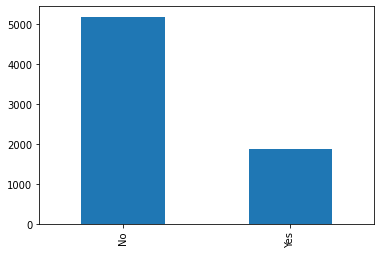

In [94]:
# lets get more insight using visulization
df.columns
print(df['Churn'].value_counts())
df['Churn'].value_counts().plot(kind='bar')
# here we can see dataset is imbalanced

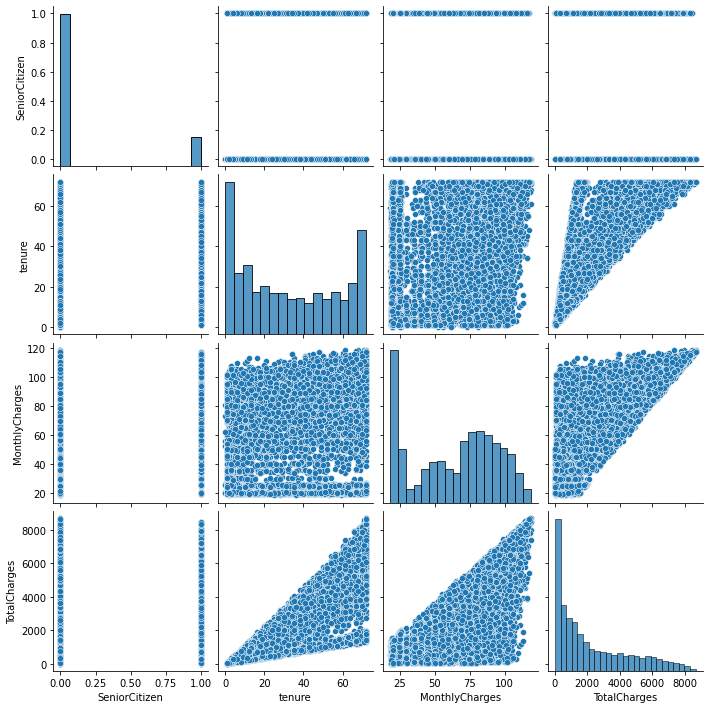

In [95]:
sns.pairplot(df)
# we can get some cool insight from below visualizations

In [96]:
# we can see 
# monthly charges and totoal charges are directly proportional to each other 

In [97]:
 # lets see the null values
 df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [98]:
# there ar 11 null values in the Total Charges
# lets remove it by using imputing
df.TotalCharges.fillna(method='ffill', inplace= True)

In [99]:
# lets verify
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## **Data set is imbalanced, so first we have to balance the dataset using SMOT, but before we have to perform Feature Engineering :) **

In [101]:
# save the output variable in a label
label = df['Churn']
df = df.drop(['Churn','customerID'], axis=1)

In [102]:
# data types of dcolumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [103]:
# changing the type of columns
# i.e object -> category 


In [104]:
text_features = df.select_dtypes(include='object')

In [105]:
# converting object data type to category type
# because we have to label encoding
for feature in text_features.columns:
    df[feature] = df[feature].astype("category")

In [106]:
# now lets verify the types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [107]:
# now we are done with data types 
# creating one hot encoding of categorical data
categorical_data = pd.get_dummies(df.select_dtypes(include='category'))

In [108]:
categorical_data

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [109]:
# import sklearn
# shold we scale the int features ?
# lets verify

df.tenure # yes we need to scale this feature

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [110]:
df.SeniorCitizen # No need of scale

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [111]:
df.MonthlyCharges # yes we need to scale this feature

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [112]:
df.TotalCharges # yes we need to scale this feature

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [113]:
# lets scale the obove features
numerical_data = df.select_dtypes(exclude='category')

In [114]:
# excluding this column becuaseb we dont have to scale this column
numerical_data = numerical_data.drop("SeniorCitizen", axis = 1)

In [115]:
numerical_data

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [116]:
# Minmax scaling 
from sklearn.preprocessing import MinMaxScaler

In [117]:
# Applying Scaling
scale = MinMaxScaler(feature_range=(0,1))
scale_data = scale.fit_transform(numerical_data)

In [118]:
scale_data = pd.DataFrame(scale_data, columns=numerical_data.columns)

In [119]:
# Data has been scaled
scale_data

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330
...,...,...,...
7038,0.333333,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.152778,0.112935,0.037809
7041,0.055556,0.558706,0.033210


In [120]:
# now lets combine the whole data
# scale data + categorical data + df.SeniorCitizen + label

complete_df = pd.concat([scale_data,categorical_data,df.SeniorCitizen,label], axis = 1) 


In [121]:
# lets verify
# you can see data has been cleaned and now we are able to apply ML Algorithm.
complete_df

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,Churn
0,0.013889,0.115423,0.001275,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,No
1,0.472222,0.385075,0.215867,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,No
2,0.027778,0.354229,0.010310,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,Yes
3,0.625000,0.239303,0.210241,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,No
4,0.027778,0.521891,0.015330,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.333333,0.662189,0.227521,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,No
7039,1.000000,0.845274,0.847461,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,No
7040,0.152778,0.112935,0.037809,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,No
7041,0.055556,0.558706,0.033210,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,Yes


In [122]:
y = complete_df['Churn']

In [123]:
X = complete_df.drop("Churn", axis = 1)

## **Now Lets balance the dataset**

In [128]:
from imblearn.over_sampling import SMOTE

In [125]:
# SMOT is oversampling tecnique for balancing the dataset 
filter = SMOTE()
X,y = filter.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [127]:
# Data has been balanced, Lets Verify
from collections import Counter as count
dict(count(y).items())
# you can see, data has been balanced

{'No': 5174, 'Yes': 5174}

In [133]:
X

array([[0.01388889, 0.11542289, 0.0012751 , ..., 1.        , 0.        ,
        0.        ],
       [0.47222222, 0.38507463, 0.21586661, ..., 0.        , 1.        ,
        0.        ],
       [0.02777778, 0.35422886, 0.01031041, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.06716316, 0.55870647, 0.04032429, ..., 0.        , 1.        ,
        1.        ],
       [0.01388889, 0.52231337, 0.00599383, ..., 1.        , 0.        ,
        1.        ],
       [0.04964473, 0.16085615, 0.01221521, ..., 0.57442031, 0.42557969,
        0.        ]])

In [163]:
# mapping the output column
y = list(map(lambda x:0 if x == 'No' else 1, y))

In [165]:
# y


### Data Preparation

split your data such that 80% of data is in training set and 20% in validation set. Normalize your dataset in the end.

In [166]:
# importing necessary ML alogos and metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, roc_curve

In [167]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2, random_state  = 42)

### Train classifier
Train a classifier, evaluate performance of your model using appropriate metrics.

In [168]:
classifier = GradientBoostingClassifier()
result = classifier.fit(X_train,Y_train)

In [169]:
# 85% accuracy on trainig dataset
result.score(X_train,Y_train)

0.8529838125151002

### Perform 5-fold validation



In [170]:
# 84 % accuracy on cross validation
valid_result = np.mean(cross_val_score(classifier,X_train,Y_train,cv=5,scoring='accuracy')) 
valid_result

0.8407828714041772

In [171]:
# lets check on validation data
# 84% accuracy on test data
y_pred = classifier.predict(X_test)
test_acc = accuracy_score(Y_test,y_pred)
test_acc

0.8497584541062801

In [173]:
# !pip install scikit-plot
# import scikitplot as skplt

In [174]:
# matrix

### **We got 85% accuracy on training dataset and 84% on cross validation and  test data which means our model have not overfitting problem**

### Draw ROC curve of your model

In [175]:
import scikitplot as skplt

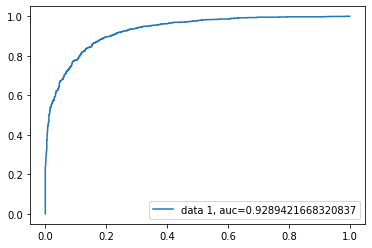

In [177]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
